In [2]:
import os
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from copy import deepcopy
from tqdm import tqdm, trange

In [ ]:
SAVE_RES_DIR = "./graphs_comparison_closed_data"

if not os.path.exists(SAVE_RES_DIR):
    os.makedirs(SAVE_RES_DIR)

In [4]:
MATRICES_PATH = "./matrices_new/relevant_matrices_closed_data/"
MATRICES_FILES = [el for el in os.listdir(MATRICES_PATH) if el.endswith(".csv")]
MATRICES_FILES

['bert__similarity_scores.csv',
 'bioclinical_bert.csv',
 'co_matrix_counts.csv',
 'fisher_closed_real_data.csv',
 'genes_graph_paper_2007.csv',
 'gpt_oss.csv',
 'mlm_results.csv',
 'scores_DeepSeek-V3_mean.csv',
 'scores_medbert.csv',
 'scores_qwen3-235b-a22b_0.csv',
 'yandex_doc_search__scores_llm_doc.csv',
 'yandex_gpt_5__yandex_prompt_matrix.csv']

In [ ]:
EXPERIMENT_TITLE = [
    "'Ground truth'\nbased on genes",

    "Fisher exact test\n(Closed data)",
    "Jaccard\nsimilarity\n(Closed data)",
    "MLM\n(Closed data)",

    "Pretrained\nMed-BERT",
    "Pretrained\nBioClinicalBERT",

    "Pretrained\nBERT",
    "Yandex Doc\nSearch",

    "GPT-OSS",
    "Qwen-3",
    "DeepSeek-v3",
    "YandexGPT-5",
]
MATRICES_FILES = [
    'genes_graph_paper_2007.csv',
    
    'fisher_closed_real_data.csv', # real data
    'co_matrix_counts.csv', # real data
    'mlm_results.csv', # real data

    'scores_medbert.csv', # pretrained med domain
    'bioclinical_bert.csv', # pretrained med domain

    'bert__similarity_scores.csv', # text
    'yandex_doc_search__scores_llm_doc.csv', # text
    
    'gpt_oss.csv', # llm
    'scores_qwen3-235b-a22b_0.csv', # llm
    'scores_DeepSeek-V3_mean.csv', # llm
    'yandex_gpt_5__yandex_prompt_matrix.csv' # llm
]

In [6]:
common_columns, common_rows = [], []
all_init_dfs = dict()

for m_file in tqdm(MATRICES_FILES):
    # if "fisher_test" in m_file:
    #     sep = ";"
    # else:
    #     sep = ","
    df = pd.read_csv(os.path.join(MATRICES_PATH, m_file), sep=",")
    if "Unnamed: 0" in df.columns:
        df = df.set_index("Unnamed: 0")
    print(m_file, df.shape)
    all_init_dfs[m_file] = df
    common_columns.append(df.columns.tolist())
    common_rows.append(df.index.tolist())

common_columns = set.intersection(*map(set, common_columns))
common_rows = set.intersection(*map(set, common_rows))

len(common_columns), len(common_rows)

 25%|██▌       | 3/12 [00:00<00:00, 26.61it/s]

genes_graph_paper_2007.csv (393, 393)
fisher_closed_real_data.csv (879, 879)
co_matrix_counts.csv (879, 879)
mlm_results.csv (860, 860)
scores_medbert.csv (1757, 1757)


 50%|█████     | 6/12 [00:00<00:00,  6.27it/s]

bioclinical_bert.csv (1704, 1704)
bert__similarity_scores.csv (1696, 1696)


 67%|██████▋   | 8/12 [00:01<00:00,  4.24it/s]

yandex_doc_search__scores_llm_doc.csv (1696, 1696)


 75%|███████▌  | 9/12 [00:01<00:00,  3.83it/s]

gpt_oss.csv (2101, 2101)


 83%|████████▎ | 10/12 [00:02<00:00,  3.83it/s]

scores_qwen3-235b-a22b_0.csv (2032, 2032)


100%|██████████| 12/12 [00:02<00:00,  4.30it/s]

scores_DeepSeek-V3_mean.csv (2046, 2046)
yandex_gpt_5__yandex_prompt_matrix.csv (1696, 1696)


(241, 241)

In [7]:
common_icds = sorted(list(common_columns & common_rows))
len(common_icds)

241

In [8]:
common_icds[:10]

['A02', 'A41', 'A42', 'B00', 'B20', 'B34', 'B37', 'B44', 'C04', 'C11']

In [9]:
QUANTILES = [
    0.25,
    0.35,
    0.5, 
    0.75, 
    0.8, 
    0.85,
    0.9,
    0.95, 
]

In [10]:
all_dfs = dict()
THRESHOLDS = dict()
for df_name, df in all_init_dfs.items():
    print(df_name)
    df1 = deepcopy(df)
    np.fill_diagonal(df1.values, 0)
    all_dfs[df_name] = df1[common_icds][df1.index.isin(common_icds)].reindex(common_icds)

    print(f"\t{np.unique(all_dfs[df_name].values.flatten()).shape} unique values from {all_dfs[df_name].values.min()} to {all_dfs[df_name].values.max()}")
    THRESHOLDS[df_name] = []
    for TH in QUANTILES:
        quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
        THRESHOLDS[df_name].append(quant)
        print("\t\t", TH, quant, sep="\t")

C:\Users\Asus\AppData\Local\Temp\ipykernel_3576\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3576\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3576\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 

genes_graph_paper_2007.csv
	(2,) unique values from 0.0 to 1.0
			0.25	0.0
			0.35	0.0
			0.5	0.0
			0.75	0.0
			0.8	0.0
			0.85	0.0
			0.9	0.0
			0.95	0.0
fisher_closed_real_data.csv
	(348,) unique values from 0 to 20828
			0.25	0
			0.35	0
			0.5	0
			0.75	0
			0.8	0
			0.85	0
			0.9	0
			0.95	6
co_matrix_counts.csv
	(219,) unique values from 0 to 6184
			0.25	0
			0.35	0
			0.5	0
			0.75	0
			0.8	0
			0.85	0
			0.9	1
			0.95	3
mlm_results.csv
	(28866,) unique values from 0.0 to 1.6059767
			0.25	0.8500254
			0.35	0.9097065
			0.5	0.9878065
			0.75	1.1204677
			0.8	1.1529927
			0.85	1.1889493
			0.9	1.2309076
			0.95	1.2939034
scores_medbert.csv
	(30081,) unique values from 0.0 to 0.9599204
			0.25	0.5332507
			0.35	0.5643574
			0.5	0.6046429
			0.75	0.67296827
			0.8	0.68903416
			0.85	0.7087187
			0.9	0.73459995
			0.95	0.7779852
bioclinical_bert.csv
	(28758,) unique values from 0.0 to 0.39600557
			0.25	0.10705954
			0.35	0.11866504
			0.5	0.13572699
			0.75	0.17122889
			0.8	0.18

C:\Users\Asus\AppData\Local\Temp\ipykernel_3576\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')
C:\Users\Asus\AppData\Local\Temp\ipykernel_3576\1420652143.py:12: DeprecationWarning: the `interpolation=` argument to quantile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  quant = np.quantile(all_dfs[df_name].values, TH, interpolation='higher')


In [ ]:
all_graphs = dict()
for df_name, df in all_dfs.items():
    print(df_name)
    all_graphs[df_name] = dict()
    for th_ind in range(len(QUANTILES)):
        quantile = QUANTILES[th_ind]
        TH = THRESHOLDS[df_name][th_ind]
        print("\t", f"quantile = {quantile};", f"TH = {TH}", sep="\t")
        print("\t", f"df.shape = {df.shape}")

        df1 = deepcopy(df)
        print("\t", f"df1.shape = {df1.shape}")
        print("\t", f"df.values.flatten().sum() = {df.values.flatten().sum()}")
        print("\t", f"df1.values.flatten().sum() = {df1.values.flatten().sum()}")

        df1 = df1 * (df1 > TH) # zeroing elements lower or equal the quantile
        df1[df1 > 0] = 1 # if an element was not zeroed, we consider it as equal to 1
        df1 = df1.astype(int)

        all_graphs[df_name][quantile] = {
            'threshold': TH,
            'graph': df1,
        }
        n_ones = all_graphs[df_name][quantile]['graph'].values.sum()
        n_el = len(common_icds) * len(common_icds)
        print("\t\t", quantile, round(n_ones / n_el * 100, 3), np.unique(df1))

genes_graph_paper_2007.csv
		quantile = 0.25;	TH = 0.0
	 df.shape = (241, 241)
	 df1.shape = (241, 241)
	 df.values.flatten().sum() = 1820.0
	 df1.values.flatten().sum() = 1820.0
		 0.25 3.134 [0 1]
		quantile = 0.35;	TH = 0.0
	 df.shape = (241, 241)
	 df1.shape = (241, 241)
	 df.values.flatten().sum() = 1820.0
	 df1.values.flatten().sum() = 1820.0
		 0.35 3.134 [0 1]
		quantile = 0.5;	TH = 0.0
	 df.shape = (241, 241)
	 df1.shape = (241, 241)
	 df.values.flatten().sum() = 1820.0
	 df1.values.flatten().sum() = 1820.0
		 0.5 3.134 [0 1]
		quantile = 0.75;	TH = 0.0
	 df.shape = (241, 241)
	 df1.shape = (241, 241)
	 df.values.flatten().sum() = 1820.0
	 df1.values.flatten().sum() = 1820.0
		 0.75 3.134 [0 1]
		quantile = 0.8;	TH = 0.0
	 df.shape = (241, 241)
	 df1.shape = (241, 241)
	 df.values.flatten().sum() = 1820.0
	 df1.values.flatten().sum() = 1820.0
		 0.8 3.134 [0 1]
		quantile = 0.85;	TH = 0.0
	 df.shape = (241, 241)
	 df1.shape = (241, 241)
	 df.values.flatten().sum() = 1820.0
	 d

In [12]:
all_graphs

{'genes_graph_paper_2007.csv': {0.25: {'threshold': 0.0,
   'graph':             A02  A41  A42  B00  B20  B34  B37  B44  C04  C11  ...  R82  S27  \
   Unnamed: 0                                                    ...             
   A02           0    1    1    0    0    0    1    0    0    0  ...    0    0   
   A41           1    0    1    0    0    0    1    0    0    0  ...    0    0   
   A42           1    1    0    0    0    0    1    0    0    0  ...    0    0   
   B00           0    0    0    0    1    1    0    0    0    0  ...    0    0   
   B20           0    0    0    1    0    1    0    0    0    0  ...    0    0   
   ...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
   Z11           0    0    0    0    1    0    0    0    0    0  ...    0    0   
   Z20           0    0    0    0    1    0    0    0    0    0  ...    0    0   
   Z52           0    0    0    0    0    0    0    0    0    0  ...    0    0   
   Z72           0    0    0    

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, average_precision_score

In [ ]:
similarity_res = []

for quantile in tqdm(QUANTILES):
    for data_name_1, graph_1 in all_graphs.items():
        for data_name_2, graph_2 in all_graphs.items():
            gr1_fl = graph_1[quantile]["graph"].values.flatten()
            gr2_fl = graph_2[quantile]["graph"].values.flatten()
            if data_name_1 != data_name_2:
                
                tn, fp, fn, tp = confusion_matrix(gr1_fl, gr2_fl).ravel().tolist()
                similarity_res.append(
                    {
                        "ground_truth_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_1)],
                        "compared_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_2)],
                        "quantile": quantile,
                        "accuracy": accuracy_score(gr1_fl, gr2_fl),
                        "precision": precision_score(gr1_fl, gr2_fl),
                        "recall": recall_score(gr1_fl, gr2_fl),
                        "f1": f1_score(gr1_fl, gr2_fl),
                        "pr_auc": average_precision_score(
                            gr1_fl,
                            all_dfs[data_name_2].values.flatten(),
                        ),
                        "graph_edit_distance": np.sum(gr1_fl != gr2_fl),
                        "TN": tn,
                        "FP": fp,
                        "FN": fn,
                        "TP": tp,
                    }
                )
            else:
                tn = gr1_fl[gr1_fl == 0].shape[0]
                tp = gr1_fl[gr1_fl == 1].shape[0]
                similarity_res.append(
                    {
                        "ground_truth_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_1)],
                        "compared_data": EXPERIMENT_TITLE[MATRICES_FILES.index(data_name_2)],
                        "quantile": quantile,
                        "accuracy": 1, 
                        "precision": 1,
                        "recall": 1,
                        "f1": 1,
                        "pr_auc": 1,
                        # "jaccard_score": 1, 
                        # "hamming_loss": 0,
                        "graph_edit_distance": 0,
                        "TN": tn,
                        "FP": 0,
                        "FN": 0,
                        "TP": tp,
                    }
                )

similarity_res = pd.DataFrame(similarity_res)
similarity_res

100%|██████████| 8/8 [00:45<00:00,  5.67s/it]


ground_truth_data                       compared_data  \
0     'Ground truth'\nbased on genes      'Ground truth'\nbased on genes   
1     'Ground truth'\nbased on genes    Fisher exact test\n(Closed data)   
2     'Ground truth'\nbased on genes  Jaccard\nsimilarity\n(Closed data)   
3     'Ground truth'\nbased on genes                  MLM\n(Closed data)   
4     'Ground truth'\nbased on genes                Pretrained\nMed-BERT   
...                              ...                                 ...   
1147                     YandexGPT-5                  Yandex Doc\nSearch   
1148                     YandexGPT-5                             GPT-OSS   
1149                     YandexGPT-5                              Qwen-3   
1150                     YandexGPT-5                         DeepSeek-v3   
1151                     YandexGPT-5                         YandexGPT-5   

      quantile  accuracy  precision    recall        f1    pr_auc  \
0         0.25  1.000000   1.000000  1.000000  1.000000  1.000000   
1         0.25  0.881803   0.053777  0.167033  0.081360  0.041325   
2         0.25  0.862468   0.054078  0.205495  0.085623  0.042753   
3         0.25  0.265509   0.031221  0.747253  0.059938  0.030902   
4         0.25  0.267506   0.032553  0.779121  0.062494  0.062293   
...        ...       ...        ...       ...       ...       ...   
1147      0.95  0.952342   0.118457  0.623188  0.199074  0.268462   
1148      0.95  0.976395   0.114770  0.221014  0.151084  0.054149   
1149      0.95  0.970696   0.161366  0.496377  0.243556  0.137333   
1150      0.95  0.967666   0.148462  0.507246  0.229696  0.203524   
1151      0.95  1.000000   1.000000  1.000000  1.000000  1.000000   

      graph_edit_distance     TN     FP    FN    TP  
0                       0  56261      0     0  1820  
1                    6865  50912   5349  1516   304  
2                    7988  49719   6542  1446   374  
3                   42660  14061  42200   460  1360  
4                   42544  14119  42142   402  1418  
...                   ...    ...    ...   ...   ...  
1147                 2768  54969   2560   208   344  
1148                 1371  56588    941   430   122  
1149                 1702  56105   1424   278   274  
1150                 1878  55923   1606   272   280  
1151                    0  57529      0     0   552  

[1152 rows x 13 columns]

In [15]:
similarity_res['ground_truth_data'] = pd.Categorical(
    similarity_res['ground_truth_data'], 
    categories=EXPERIMENT_TITLE, 
    ordered=True,
)
similarity_res['compared_data'] = pd.Categorical(
    similarity_res['compared_data'], 
    categories=EXPERIMENT_TITLE, 
    ordered=True,
)

In [16]:
similarity_res['ground_truth_data'].unique()

[''Ground truth'\nbased on genes', 'Fisher exact test\n(Closed data)', 'Jaccard\nsimilarity\n(Closed data)', 'MLM\n(Closed data)', 'Pretrained\nMed-BERT', ..., 'Yandex Doc\nSearch', 'GPT-OSS', 'Qwen-3', 'DeepSeek-v3', 'YandexGPT-5']
Length: 12
Categories (12, object): [''Ground truth'\nbased on genes' < 'Fisher exact test\n(Closed data)' < 'Jaccard\nsimilarity\n(Closed data)' < 'MLM\n(Closed data)' ... 'GPT-OSS' < 'Qwen-3' < 'DeepSeek-v3' < 'YandexGPT-5']

In [17]:
similarity_res[similarity_res["quantile"] == 0.95].pivot(index='ground_truth_data', columns='compared_data', values='accuracy')

compared_data                       'Ground truth'\nbased on genes  \
ground_truth_data                                                    
'Ground truth'\nbased on genes                            1.000000   
Fisher exact test\n(Closed data)                          0.926654   
Jaccard\nsimilarity\n(Closed data)                        0.931027   
MLM\n(Closed data)                                        0.921213   
Pretrained\nMed-BERT                                      0.929340   
Pretrained\nBioClinicalBERT                               0.921351   
Pretrained\nBERT                                          0.923831   
Yandex Doc\nSearch                                        0.934023   
GPT-OSS                                                   0.954908   
Qwen-3                                                    0.948245   
DeepSeek-v3                                               0.945972   
YandexGPT-5                                               0.965772   

compared_data                       Fisher exact test\n(Closed data)  \
ground_truth_data                                                      
'Ground truth'\nbased on genes                              0.926654   
Fisher exact test\n(Closed data)                            1.000000   
Jaccard\nsimilarity\n(Closed data)                          0.985882   
MLM\n(Closed data)                                          0.908817   
Pretrained\nMed-BERT                                        0.908197   
Pretrained\nBioClinicalBERT                                 0.904857   
Pretrained\nBERT                                            0.908473   
Yandex Doc\nSearch                                          0.910263   
GPT-OSS                                                     0.939274   
Qwen-3                                                      0.932439   
DeepSeek-v3                                                 0.927618   
YandexGPT-5                                                 0.946489   

compared_data                       Jaccard\nsimilarity\n(Closed data)  \
ground_truth_data                                                        
'Ground truth'\nbased on genes                                0.931027   
Fisher exact test\n(Closed data)                              0.985882   
Jaccard\nsimilarity\n(Closed data)                            1.000000   
MLM\n(Closed data)                                            0.913328   
Pretrained\nMed-BERT                                          0.913121   
Pretrained\nBioClinicalBERT                                   0.908989   
Pretrained\nBERT                                              0.912984   
Yandex Doc\nSearch                                            0.914430   
GPT-OSS                                                       0.943992   
Qwen-3                                                        0.937673   
DeepSeek-v3                                                   0.932439   
YandexGPT-5                                                   0.951413   

compared_data                       MLM\n(Closed data)  Pretrained\nMed-BERT  \
ground_truth_data                                                              
'Ground truth'\nbased on genes                0.921213              0.929340   
Fisher exact test\n(Closed data)              0.908817              0.908197   
Jaccard\nsimilarity\n(Closed data)            0.913328              0.913121   
MLM\n(Closed data)                            1.000000              0.904685   
Pretrained\nMed-BERT                          0.904685              1.000000   
Pretrained\nBioClinicalBERT                   0.905098              0.903101   
Pretrained\nBERT                              0.903996              0.911503   
Yandex Doc\nSearch                            0.904409              0.932370   
GPT-OSS                                       0.933111              0.938551   
Qwen-3                                        0.922970              0.932887   
DeepSeek-v3  

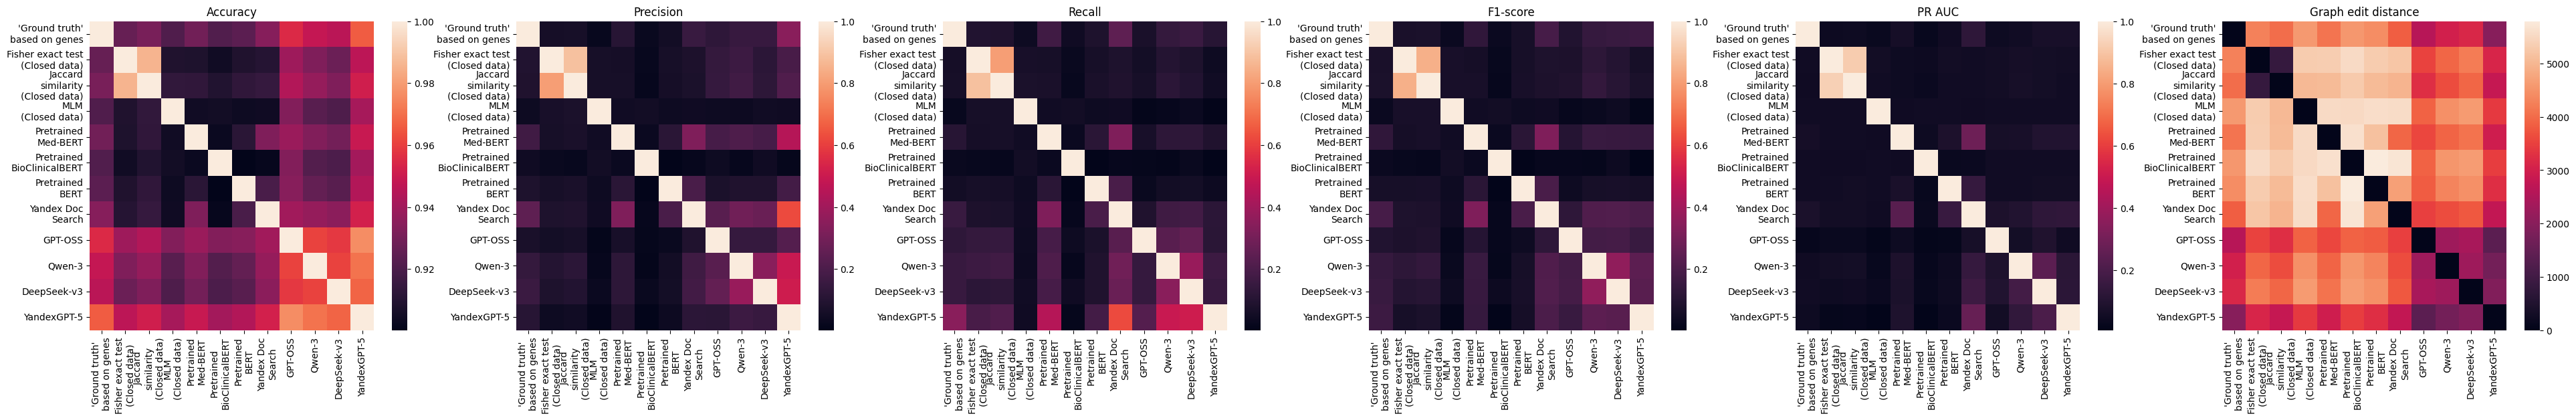

In [ ]:
metrics_to_viz = {
    "accuracy": "Accuracy",
    "precision": "Precision",
    "recall": "Recall",
    "f1": "F1-score",
    "pr_auc": "PR AUC",
    "graph_edit_distance": "Graph edit distance",
}
n = len(metrics_to_viz)
fig, ax = plt.subplots(1, n, figsize=(8*n, 6))

for i, (metric, metric_name) in enumerate(metrics_to_viz.items()):
    sns.heatmap(
        data=similarity_res[similarity_res["quantile"] == 0.95].pivot(index='ground_truth_data', columns='compared_data', values=metric),
        ax=ax[i],
    )
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].set_title(metric_name);

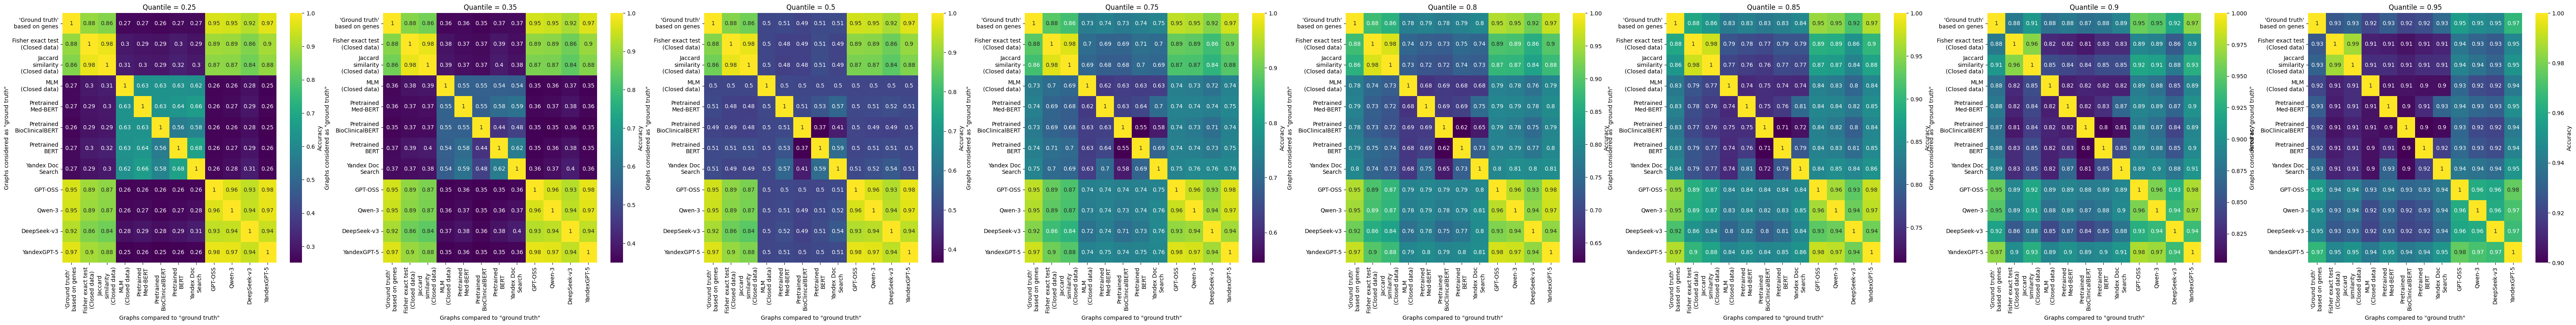

In [ ]:
metrics_to_viz = {
    "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        pivot_data = similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3)
        pivot_data.to_excel(
            f"{SAVE_RES_DIR}/{metric}_mimic_quantile_{quntile}.xlsx"
        )
        sns.heatmap(
            data=pivot_data,
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

plt.savefig(
    f"{SAVE_RES_DIR}/accuracy_closed_data_quantiles_{'_'.join(map(str, QUANTILES)).replace('.', '')}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

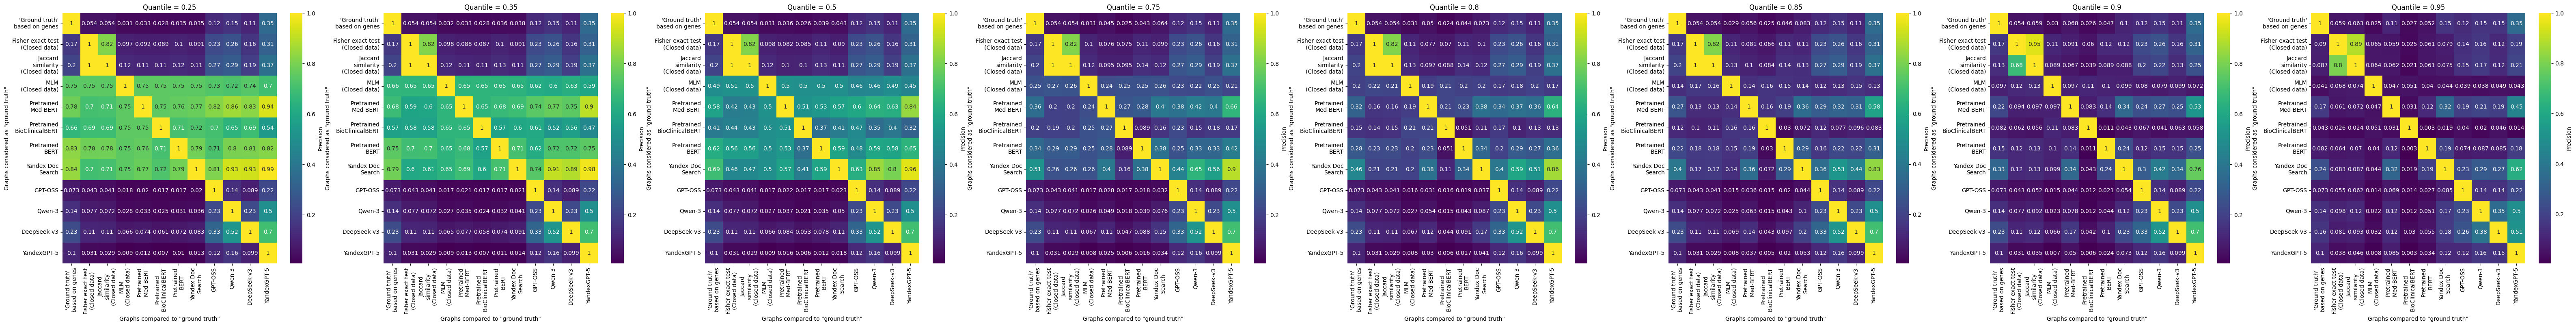

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        pivot_data = similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3)
        pivot_data.to_excel(
            f"{SAVE_RES_DIR}/{metric}_mimic_quantile_{quntile}.xlsx"
        )
        sns.heatmap(
            data=pivot_data,
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

plt.savefig(
    f"{SAVE_RES_DIR}/precision_closed_data_quantiles_{'_'.join(map(str, QUANTILES)).replace('.', '')}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

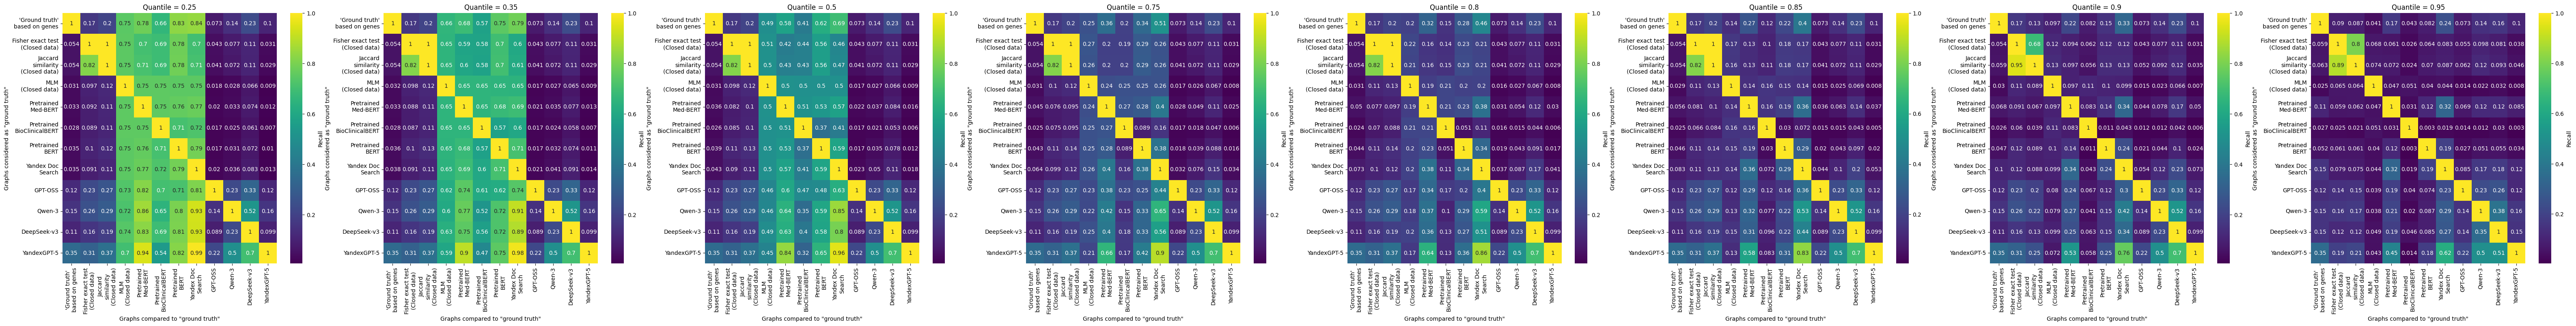

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        pivot_data = similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3)
        pivot_data.to_excel(
            f"{SAVE_RES_DIR}/{metric}_mimic_quantile_{quntile}.xlsx"
        )
        sns.heatmap(
            data=pivot_data,
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

plt.savefig(
    f"{SAVE_RES_DIR}/recall_closed_data_quantiles_{'_'.join(map(str, QUANTILES)).replace('.', '')}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()

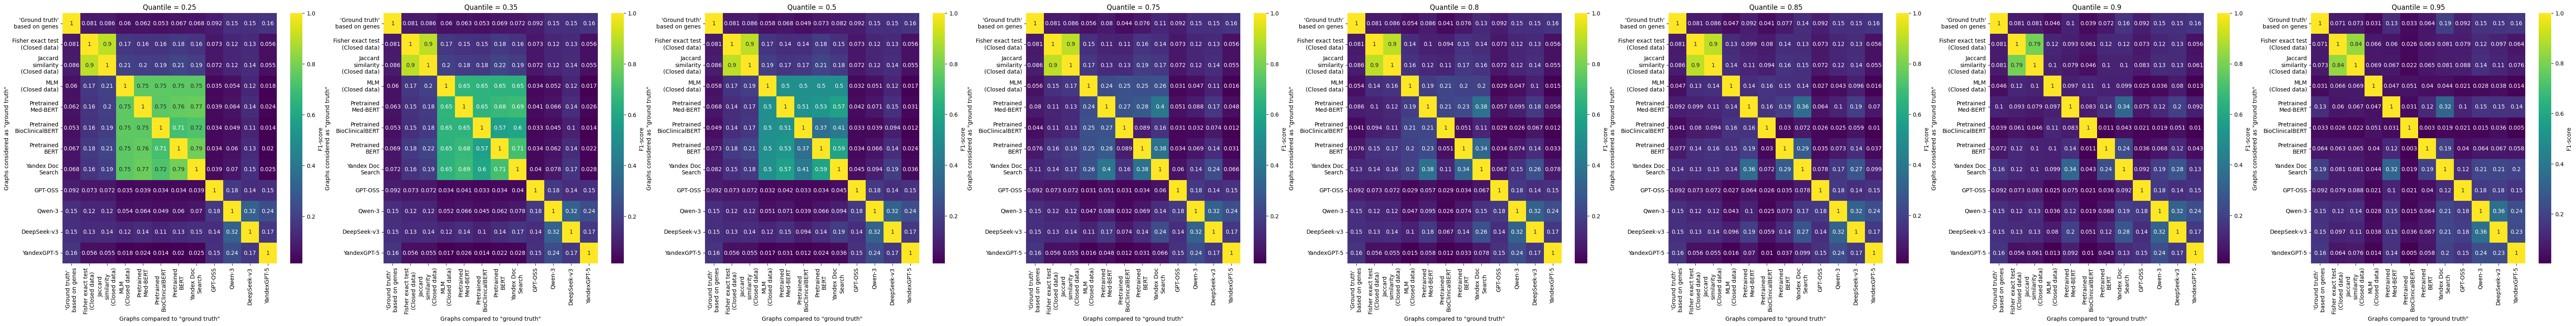

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        sns.heatmap(
            data=similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3),
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

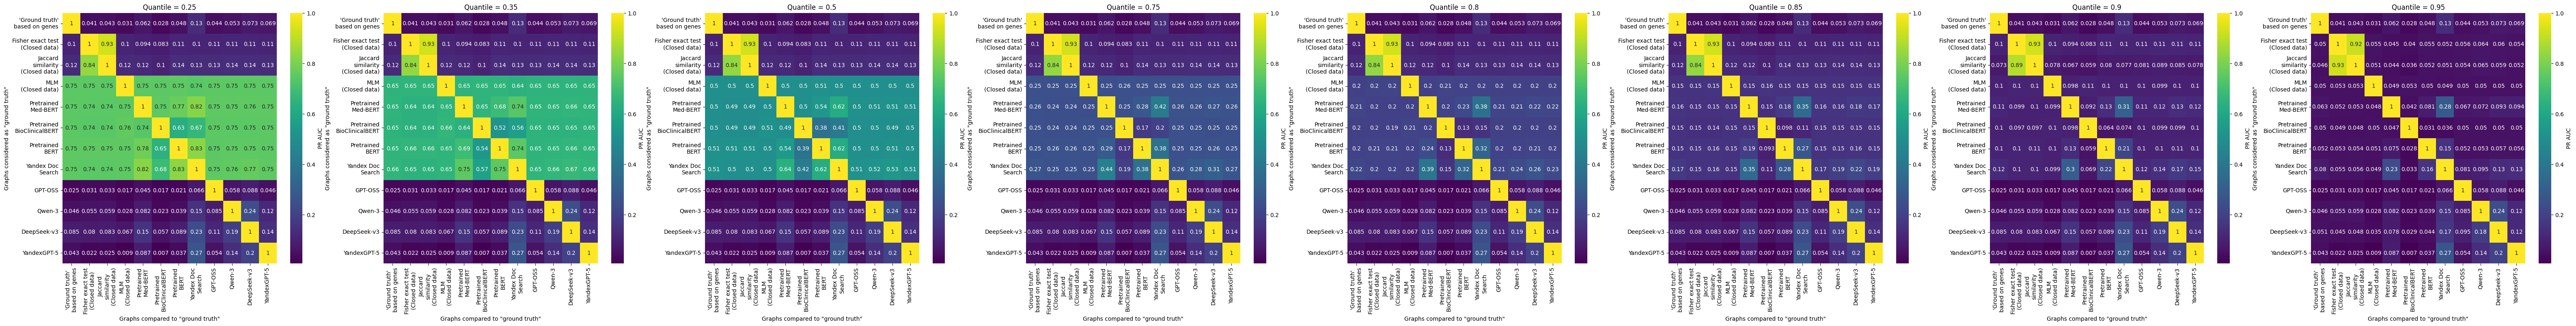

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        sns.heatmap(
            data=similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric).round(3),
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

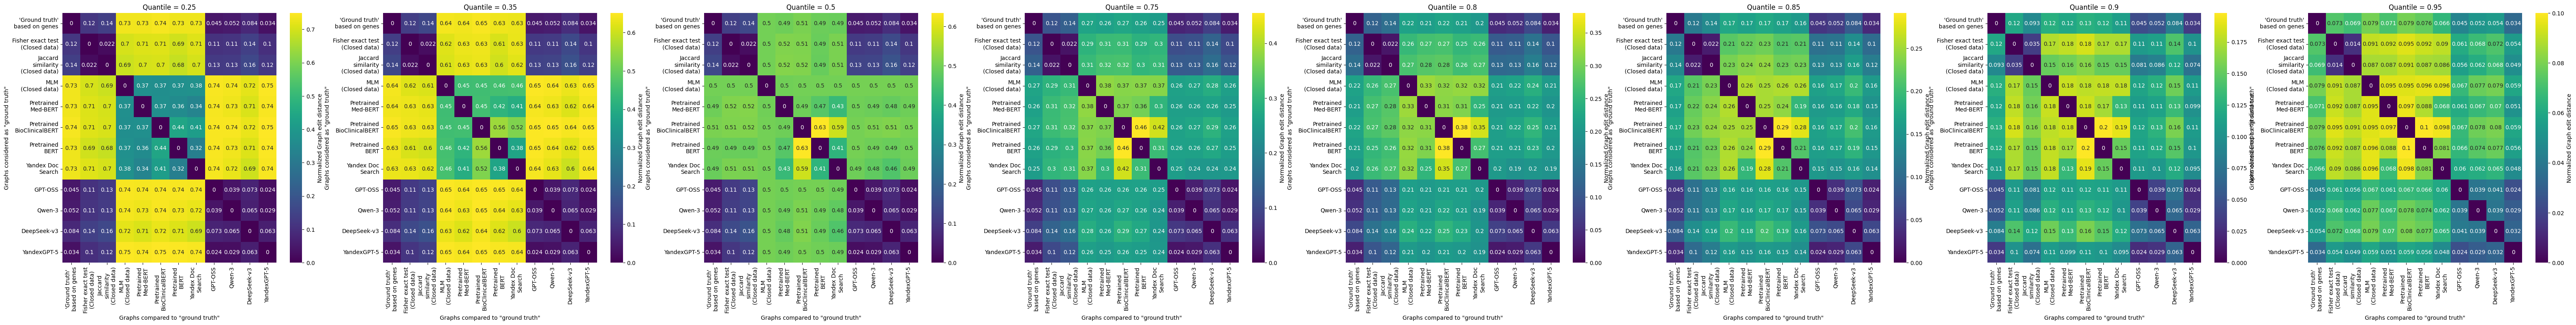

In [ ]:
metrics_to_viz = {
    # "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    "graph_edit_distance": "Graph edit distance",
}
n = len(QUANTILES)
fig, ax = plt.subplots(1, n, figsize=(10*n, 8))

for i, quntile in enumerate(QUANTILES):
    for metric, metric_name in metrics_to_viz.items():
        sns.heatmap(
            data=(similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric) / len(common_icds) / len(common_icds)).round(3),
            ax=ax[i],
            cmap="viridis",
            cbar_kws={"label": "Normalized "+metric_name},
            annot=True,
        )
        ax[i].set_xlabel('Graphs compared to "ground truth"')
        ax[i].set_ylabel('Graphs considered as "ground truth"')
        ax[i].set_title(f"Quantile = {quntile}");

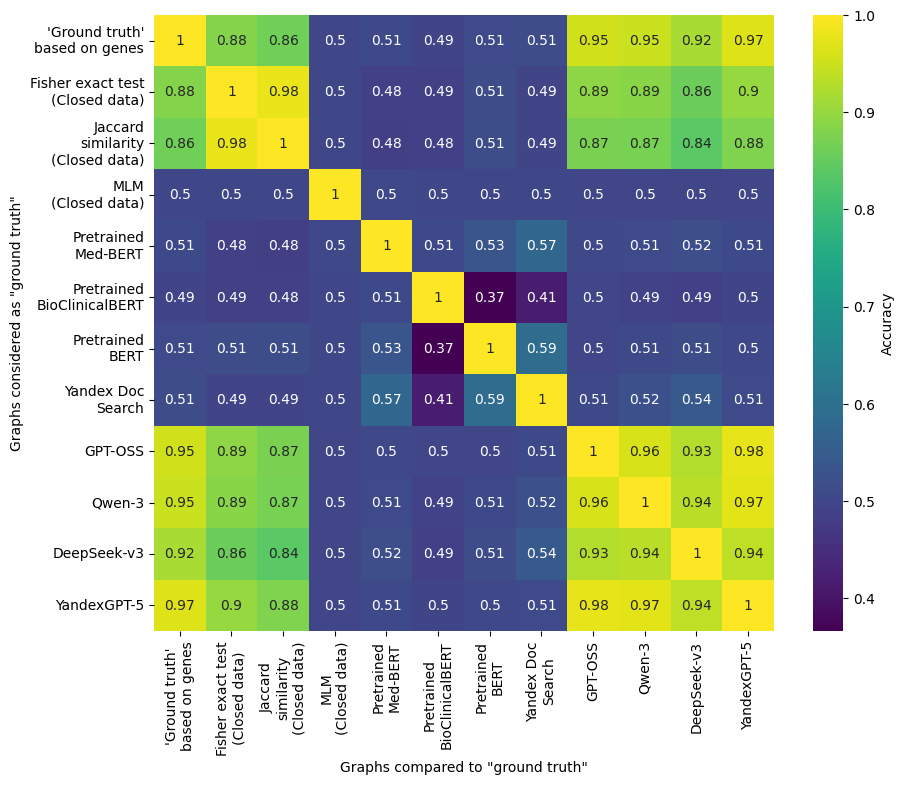

In [ ]:
metrics_to_viz = {
    "accuracy": "Accuracy",
    # "precision": "Precision",
    # "recall": "Recall",
    # "f1": "F1-score",
    # "pr_auc": "PR AUC",
    # "graph_edit_distance": "Graph edit distance",
}
# n = len(QUANTILES)
fig, ax = plt.subplots(1, len(metrics_to_viz), figsize=(10*len(metrics_to_viz), 8))

quntile = 0.5

for i, (metric, metric_name) in enumerate(metrics_to_viz.items()):
    data_to_viz = similarity_res[similarity_res["quantile"] == quntile].pivot(index='ground_truth_data', columns='compared_data', values=metric)
    if metric == "graph_edit_distance":
        data_to_viz = data_to_viz / len(common_icds) / len(common_icds)
        metric_name = "Normalized " + metric_name.lower()
    sns.heatmap(
        data=data_to_viz.round(3),
        ax=ax,
        cmap="viridis",
        cbar_kws={"label": metric_name},
        annot=True,
    )
    ax.set_xlabel('Graphs compared to "ground truth"')
    ax.set_ylabel('Graphs considered as "ground truth"')

plt.savefig(
    f"{SAVE_RES_DIR}/accuracy_closed_data_quantile_{quntile}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()